<a href="https://colab.research.google.com/github/Aytsan11/AI-DL/blob/main/Keras_%D0%9B%D0%A02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка и предобработка

In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/House_Price.csv')
df

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,NaN,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,NaN,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,NaN,47,YES,0.060694


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    351 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [5]:
df = df.drop('waterbody', axis = 1)
df = df.dropna(subset='n_hos_beds')

In [6]:
crime_mean = df['crime_rate'].mean()
crime_mean

3.588967791164659

In [7]:
df

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,55,YES,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,27,YES,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,20,YES,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,47,YES,0.060694


In [8]:
df['airport'] = df['airport'].map({'YES':1,'NO':0})
df['bus_ter'] = df['bus_ter'].map({'YES':1,'NO':0})
df['crime_d'] = (df['crime_rate'] > crime_mean).astype(int)

In [9]:
df

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,bus_ter,parks,crime_d
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,1,5.480,11.1920,23,1,0.049347,0
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,0,7.332,12.1728,42,1,0.046146,0
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,0,7.394,101.1200,38,1,0.045764,0
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,1,9.268,11.2672,45,1,0.047151,0
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,0,8.824,11.2896,55,1,0.039474,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,0,9.348,12.1792,27,1,0.056006,0
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,1,6.612,13.1648,20,1,0.059903,0
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,0,5.478,12.1912,31,1,0.057572,0
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,1,7.940,15.1760,47,1,0.060694,0


In [10]:
Y = df['crime_d']
X = df.drop('crime_d', axis=1)
X = X.drop('crime_rate', axis=1)

In [11]:
scal_X = StandardScaler().fit_transform(X)
scal_X = pd.DataFrame(scal_X, columns=X.columns)

In [12]:
#разделение выборок
X_train_full,X_test,y_train_full,y_test = train_test_split(scal_X,Y,test_size=0.3,random_state=11)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.3,random_state=11)

# Модель 1, параметры:
* learning_rate=0.001
* dense = 32 - 16 - 1
* epochs = 70
* batch_size = 20

In [13]:
model = keras.models.Sequential()

In [14]:
X_train.shape

(243, 17)

In [15]:
opt = keras.optimizers.Adam(learning_rate=0.001)

In [16]:
model.add(Dense(32, activation='relu', input_dim=17))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      tf.keras.metrics.Precision(),
                      tf.keras.metrics.Recall()])

history=model.fit(X_train, y_train, epochs = 70, batch_size=20)

acc=model.evaluate(X_test,y_test)
print(np.array(acc)[1].round(2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - binary_accuracy: 0.6075 - loss: 0.6687 - precision: 0.1566 - recall: 0.2083
Epoch 2/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.7798 - loss: 0.5428 - precision: 0.4667 - recall: 0.4086
Epoch 3/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.7943 - loss: 0.4766 - precision: 0.5967 - recall: 0.3670 
Epoch 4/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.8401 - loss: 0.4212 - precision: 0.6654 - recall: 0.4757 
Epoch 5/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.8575 - loss: 0.3766 - precision: 0.7397 - recall: 0.6068 
Epoch 6/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.8695 - loss: 0.3540 - precision: 0.7269 - recall: 0.5644 
Epoch 7/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.9004 - loss: 0.3213 - precision: 0.8168 - recall: 0.7139 
Epoch 8/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.8995 - loss: 0.3044 - precis

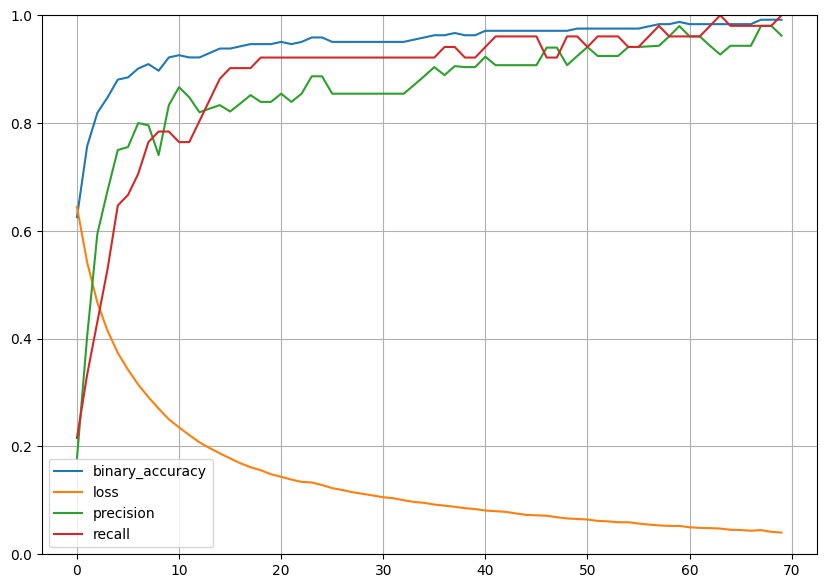

In [17]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
y_pred_n1 = model.predict(X_test) > 0.5
y_pred_n1[:10]

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


array([[False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False]])

In [19]:
#преобразуем bool в метки класса
y_pred_n1 = y_pred_n1.reshape(-1)*1
y_pred_n1[:10]

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0])

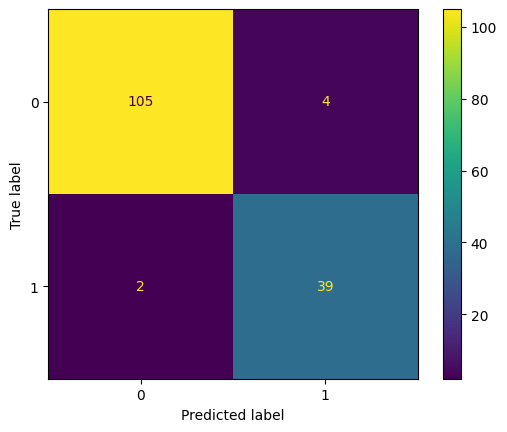

In [20]:
#матрица путаницы
cm = confusion_matrix(y_test, y_pred_n1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [21]:
accuracy = accuracy_score(y_test, y_pred_n1)
recall = recall_score(y_test, y_pred_n1)
f1 = f1_score(y_test, y_pred_n1)

print(f'Точность на тестовой выборке: {accuracy:.2f}')
print(f'Полнота на тестовой выборке: {recall:.2f}')
print(f'F-1 на тестовой выборке: {f1:.2f}')

Точность на тестовой выборке: 0.96
Полнота на тестовой выборке: 0.95
F-1 на тестовой выборке: 0.93


# Модель 2, параметры:
* learning_rate=0.0005
* dense = 20 - 14 - 8 - 1
* epochs = 85
* batch_size = 25

In [22]:
opt = keras.optimizers.Adam(learning_rate=0.0005)

In [23]:
model_2 = keras.models.Sequential()
model_2.add(Dense(20, activation='relu', input_dim=17))
model_2.add(Dense(14, activation='relu'))
model_2.add(Dense(8, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      tf.keras.metrics.Precision(),
                      tf.keras.metrics.Recall()])

history_2 = model_2.fit(X_train, y_train, epochs = 85, batch_size=25)

acc=model_2.evaluate(X_test,y_test)
print(np.array(acc)[1].round(2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/85
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - binary_accuracy: 0.4376 - loss: 0.7378 - precision_1: 0.2617 - recall_1: 0.8377
Epoch 2/85
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.6170 - loss: 0.6885 - precision_1: 0.2953 - recall_1: 0.8269 
Epoch 3/85
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.7019 - loss: 0.6282 - precision_1: 0.3970 - recall_1: 0.7822 
Epoch 4/85
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.7382 - loss: 0.5963 - precision_1: 0.3876 - recall_1: 0.5923         
Epoch 5/85
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.8064 - loss: 0.5448 - precision_1: 0.5731 - recall_1: 0.6399 
Epoch 6/85
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.8338 - loss: 0.5132 - precision_1: 0.5472 - recall_1: 0.6491 
Epoch 7/85
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.8095 - loss: 0.4995 - precision_1: 0.5742 - recall_1: 0.5946 
Epoch 8/85
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_acc

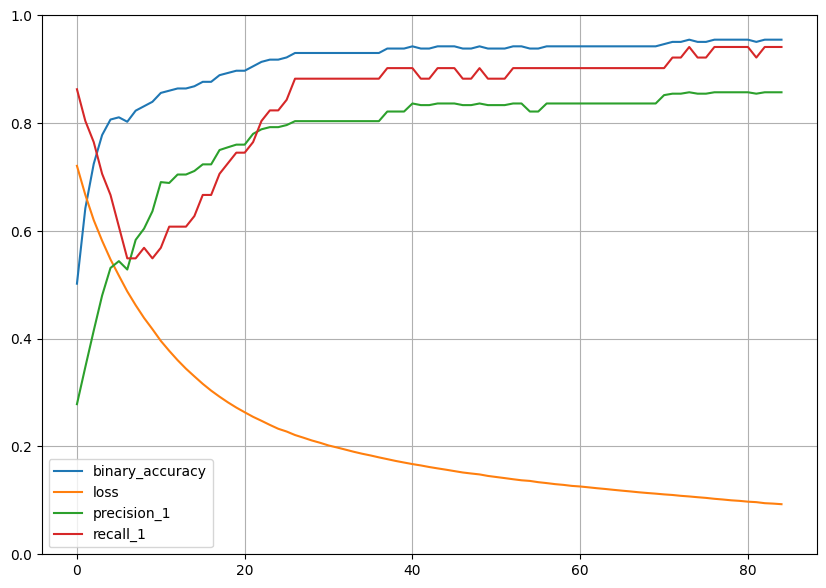

In [24]:
pd.DataFrame(history_2.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [25]:
y_pred_n2 = model_2.predict(X_test) > 0.5 #по умолчанию predict возвращает вероятность 1 класса
y_pred_n2[:10]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True]])

In [26]:
#преобразуем bool в метки класса
y_pred_n2 = y_pred_n2.reshape(-1)*1
y_pred_n2[:10]

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1])

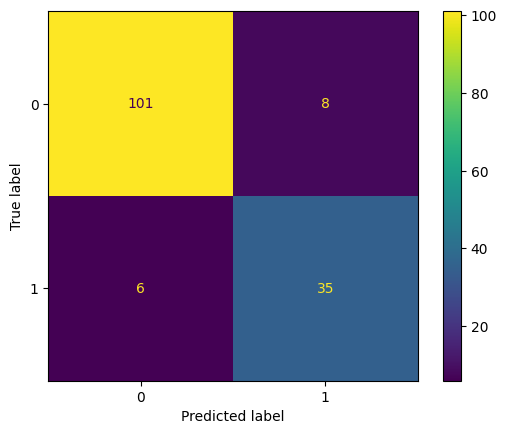

In [27]:
#матрица путаницы
cm = confusion_matrix(y_test, y_pred_n2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [28]:
accuracy = accuracy_score(y_test, y_pred_n2)
recall = recall_score(y_test, y_pred_n2)
f1 = f1_score(y_test, y_pred_n2)

print(f'Точность на тестовой выборке: {accuracy:.2f}')
print(f'Полнота на тестовой выборке: {recall:.2f}')
print(f'F-1 на тестовой выборке: {f1:.2f}')

Точность на тестовой выборке: 0.91
Полнота на тестовой выборке: 0.85
F-1 на тестовой выборке: 0.83


# Модель 3, параметры:
* learning_rate=0.0001
* dense = 17 - 13 - 10 - 8 - 1
* epochs = 100
* batch_size = 30

In [29]:
opt = keras.optimizers.Adam(learning_rate=0.0001)

In [30]:
model_3 = keras.models.Sequential()
model_3.add(Dense(17, activation='relu', input_dim=17))
model_3.add(Dense(13, activation='relu'))
model_3.add(Dense(10, activation='relu'))
model_3.add(Dense(8, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      tf.keras.metrics.Precision(),
                      tf.keras.metrics.Recall()])

history_3 = model_3.fit(X_train, y_train, epochs = 100, batch_size=30)

acc=model_3.evaluate(X_test,y_test)
print(np.array(acc)[1].round(2))

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - binary_accuracy: 0.2229 - loss: 0.8016 - precision_2: 0.1902 - recall_2: 0.9815
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.2693 - loss: 0.7781 - precision_2: 0.2374 - recall_2: 0.9776 
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.2646 - loss: 0.7768 - precision_2: 0.2151 - recall_2: 0.9941 
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.2726 - loss: 0.7528 - precision_2: 0.2222 - recall_2: 0.9890 
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.2597 - loss: 0.7707 - precision_2: 0.1970 - recall_2: 0.9887 
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.2914 - loss: 0.7553 - precision_2: 0.2319 - recall_2: 0.9605 
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.2862 - loss: 0.7483 - precision_2: 0.2197 - recall_2: 0.9662 
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.3284 - loss: 0.7332

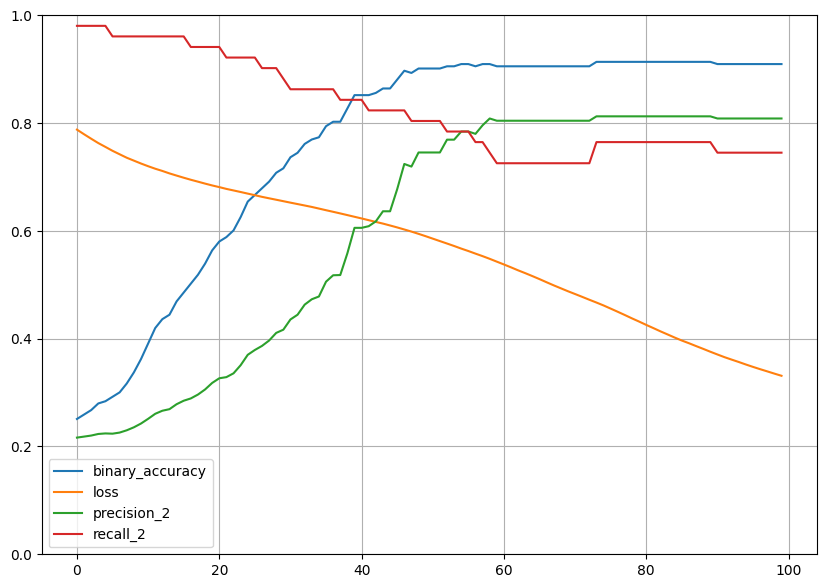

In [31]:
pd.DataFrame(history_3.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [36]:
y_pred_n3 = model_3.predict(X_test) > 0.5 #по умолчанию predict возвращает вероятность 1 класса
y_pred_n3[:10]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([[False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True]])

In [37]:
#преобразуем bool в метки класса
y_pred_n3 = y_pred_n3.reshape(-1)*1
y_pred_n3[:10]

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1])

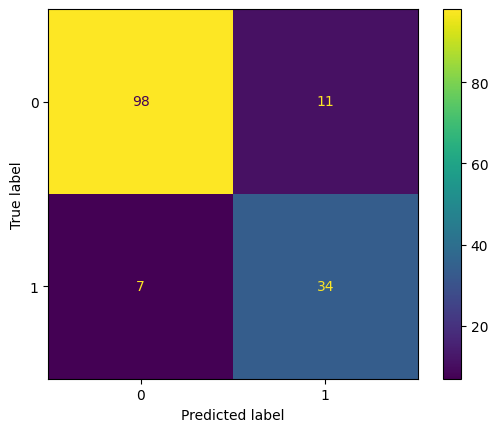

In [38]:
#матрица путаницы
cm = confusion_matrix(y_test, y_pred_n3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [39]:
accuracy = accuracy_score(y_test, y_pred_n3)
recall = recall_score(y_test, y_pred_n3)
f1 = f1_score(y_test, y_pred_n3)

print(f'Точность на тестовой выборке: {accuracy:.2f}')
print(f'Полнота на тестовой выборке: {recall:.2f}')
print(f'F-1 на тестовой выборке: {f1:.2f}')

Точность на тестовой выборке: 0.88
Полнота на тестовой выборке: 0.83
F-1 на тестовой выборке: 0.79
